# Trabajo práctico integrador - Análisis de datos

### Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516) 
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)


## Análisis exploratorio inicial

#### Dataset elegido: "Rain in Australia"

Preguntas interesantes para considerar aquí: 

- El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual

In [15]:
# Importacion de librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import matplotlib.dates as mdates

In [16]:
# Carga del dataset y visualizacion
dataset = pd.read_csv('../dataset/weatherAUS.csv')

print(f"Dataset size: {dataset.shape}")
dataset.head()

Dataset size: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Inicialmente el dataset contiene informacion de:
- Tiempo (date)
- Localizacion (region)
- Informacion meteorologica (rainfall, wind speed, Pressure, etc)

In [3]:
# Visualizo el tipo de informacion que contiene el dataset
print(f"Dataset info: \n{dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### NOTA: 

- De la celda anterior, vemos que el dataset contiene informacion categorica (object) y numerica (int/float). Ademas de que a priori hay datos faltantes


In [4]:
# Busco por valores duplicados
print("Valores duplicados: ", dataset.duplicated().sum())

Valores duplicados:  0


#### Analisis de variables Numericas y Categoricas

##### Variables categoricas

In [5]:
dataset.describe(include=["object"])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [6]:
print("WindGustDir:",dataset['WindGustDir'].unique())
print("Location:",dataset['Location'].unique())
print("RainToday:",dataset['RainToday'].unique())
print("RainTomorrow:",dataset['RainTomorrow'].unique())


WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
RainToday: ['No' 'Yes' nan]
RainTomorrow: ['No' 'Yes' nan]


In [7]:
# Selección de variables categóricas
categorical_features = dataset.select_dtypes(include=[object])

# Calcular la cardinalidad de cada variable categórica
for col in categorical_features.columns:
    cardinality = dataset[col].nunique()
    print(f"{col}: {cardinality}")


Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


###### NOTA IMPORTANTE

Podemos ver que de la celda anterior:

- tenemos informacion de 3436 fechas diferentes y de 49 regiones diferentes.
- el numero de variables asociadas con el viento es consistente (16)
- lo mismo con la lluvia (2)
- no hay variables categoricas con alta cardinalidad lo que es bueno.


--- 
A continuacion voy a analizar como esta distribuida las variable de salida (target) que representa la columna "RainTomorrow"

------------ 

# PUNTO 3

Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

¿Qué supuestos puede realizar acerca de los datos faltantes? 
¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.

En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. 

Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.

¿Qué puede decir acerca de las relaciones entre las variables de entrada?

Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de 
entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. 

Explique brevemente los métodos utilizados.

## Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.


In [8]:
# Procesamiento de los datos faltantes 

# variables numericas
print("Porcentaje de valores numericos faltantes:")
print((dataset.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False))

# variables categoricas
print("\nPorcentaje de valores categoricos faltantes:")
print((dataset.select_dtypes(include=['object']).isnull().mean() * 100).sort_values(ascending=False))



Porcentaje de valores numericos faltantes:
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindGustSpeed     7.055548
Humidity3pm       3.098446
Temp3pm           2.481094
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
dtype: float64

Porcentaje de valores categoricos faltantes:
WindDir9am      7.263853
WindGustDir     7.098859
WindDir3pm      2.906641
RainTomorrow    2.245978
RainToday       2.241853
Date            0.000000
Location        0.000000
dtype: float64


/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/3644105646.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MissingPercentage', y='Feature', data=missing_data, palette='viridis')


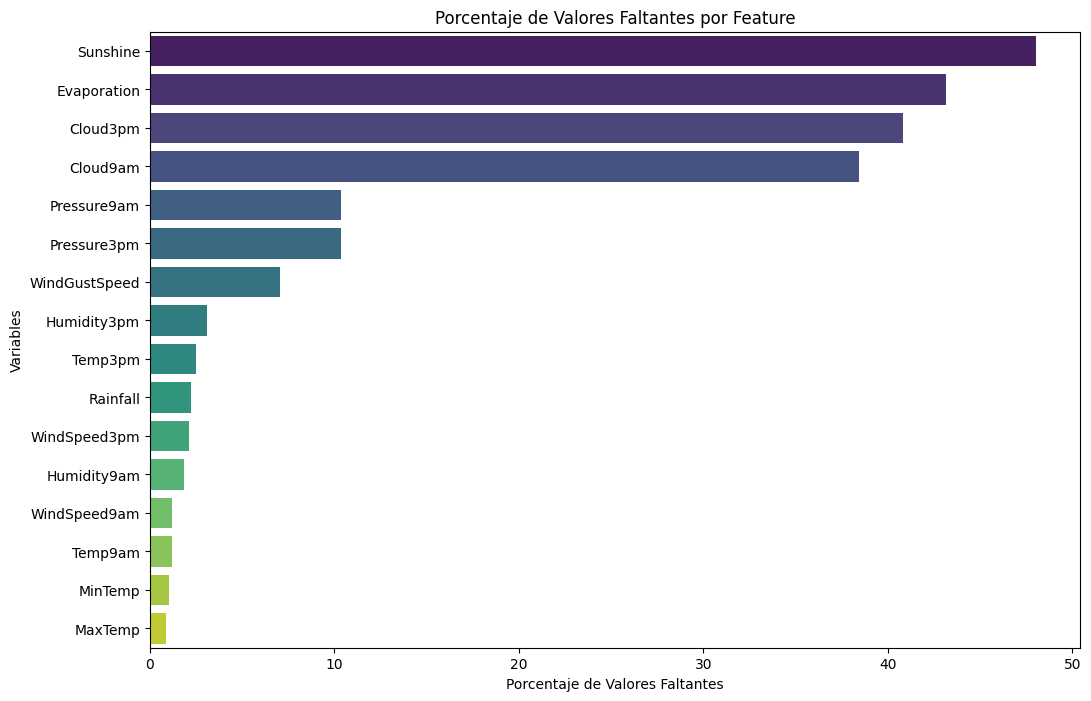

In [9]:
# Calculo el porcentaje de valores faltantes para cada columna
missing_values = dataset.select_dtypes(include=['float64', 'int64']).isna().sum()
missing_percentage = (missing_values / len(dataset)) * 100
missing_data = pd.DataFrame({'Feature': missing_values.index, 'MissingPercentage': missing_percentage})
missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='MissingPercentage', y='Feature', data=missing_data, palette='viridis')
plt.title('Porcentaje de Valores Faltantes por Feature')
plt.xlabel('Porcentaje de Valores Faltantes')
plt.ylabel('Variables')
plt.show()

<Axes: >

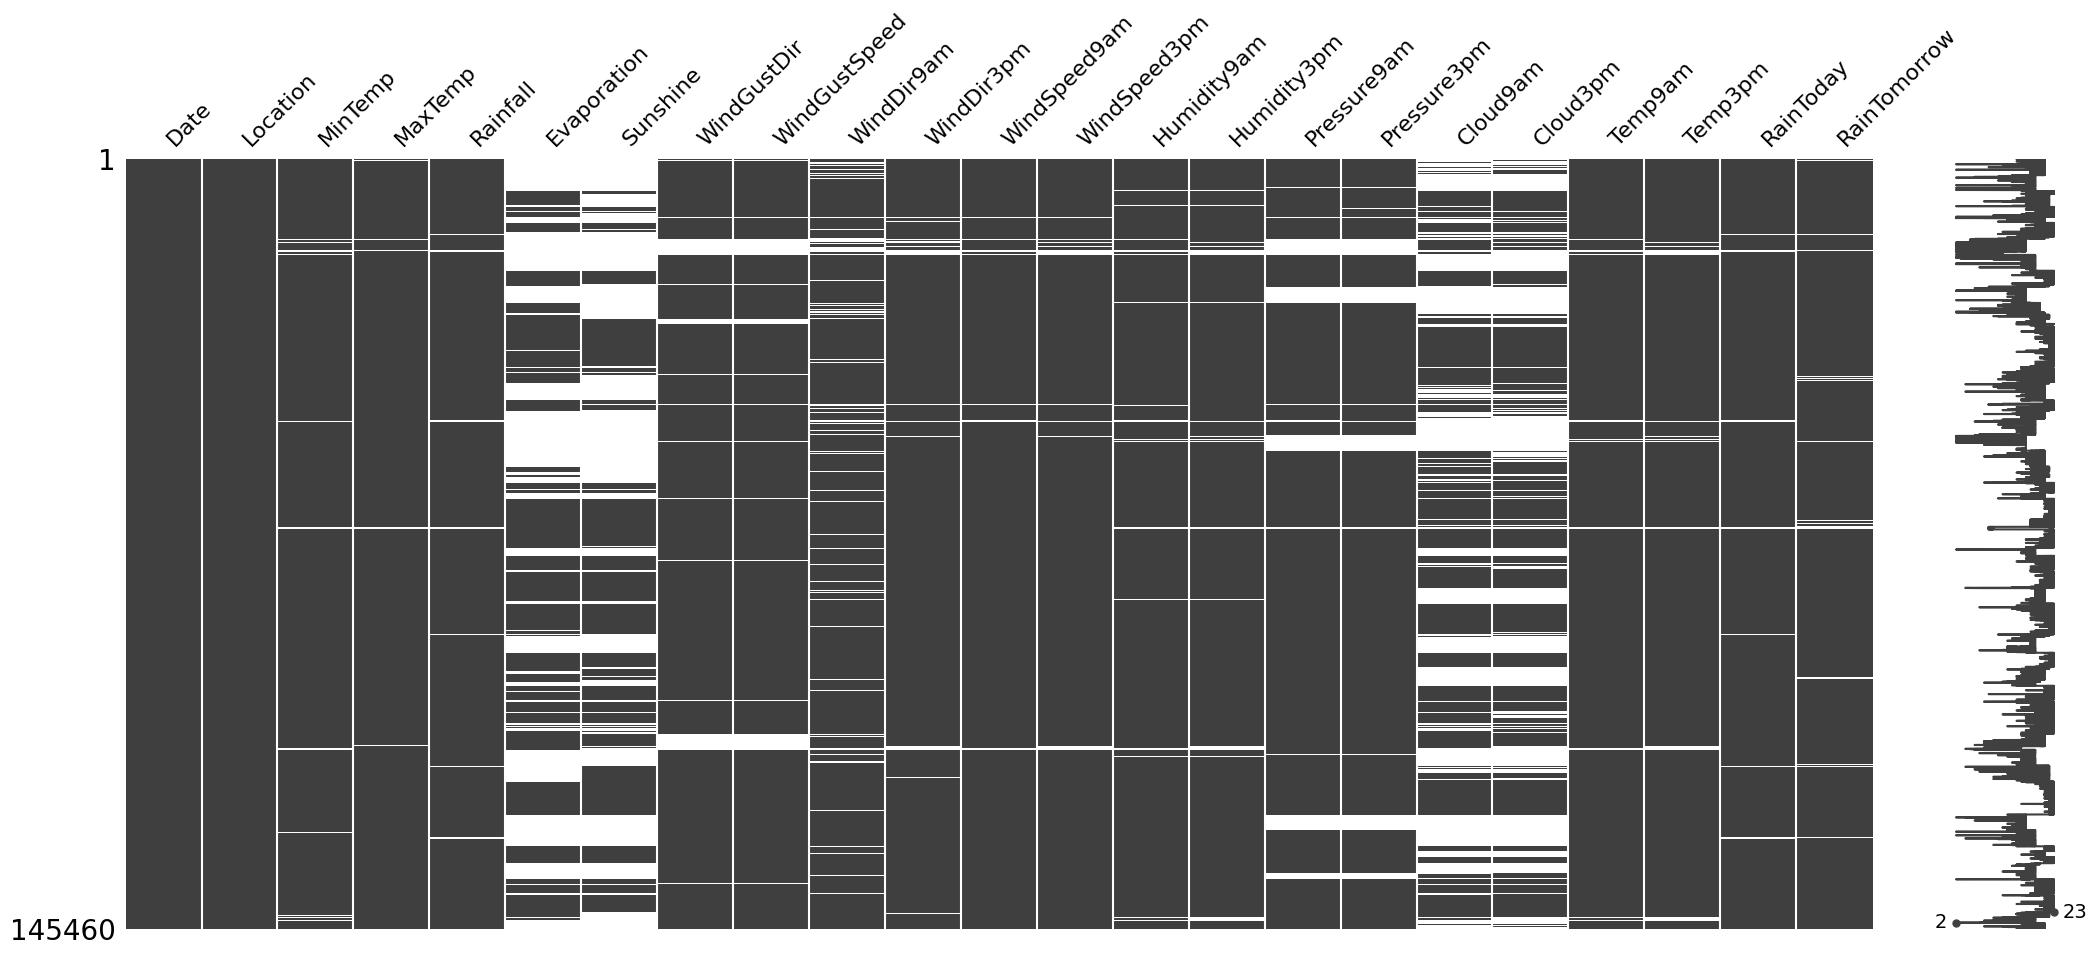

In [10]:

import missingno as msno
msno.matrix(dataset)

**NOTA SOBRE VALORES FALTANTES**

La mayor parte de las variables numericas tienen un bajo porcentaje de valores perdidos. Sin embargo estas siguientes tiene valore que debemos notar:

- Sunshine         48.009762
- Evaporation      43.166506
- Cloud3pm         40.807095
- Cloud9am         38.421559
- Pressure9am      10.356799
- Pressure3pm      10.331363

Por otro lado las variables categoricas mas relevantes con perdidas de datos son:

- WindDir9am      7.263853
- WindGustDir     7.098859

**Analisis por region**

Puede que haya que analizar las variables por cada region porque vimos que habia un desbalance en la toma de datos. por lo que las clases podrias estar no unfirmes

In [11]:
# Análisis de valores faltantes por regiones
missing_data_percentage = dataset.groupby('Location').apply(lambda x: x.isnull().mean() * 100)

# Función para aplicar colores de fondo condicionales
def conditional_bg_color(val):
    red = min(255, int(2.55 * val))
    green = min(255, int(2.55 * (100 - val)))
    return f'background-color: rgb({red}, {green}, 0); color: black;'

missing_data_percentage.style.applymap(conditional_bg_color)

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/877590217.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_percentage = dataset.groupby('Location').apply(lambda x: x.isnull().mean() * 100)
/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/877590217.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  missing_data_percentage.style.applymap(conditional_bg_color)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.000000,0.000000,0.062637,0.093956,3.194488,46.633260,44.597557,0.814281,0.814281,8.581272,0.501096,0.156593,0.156593,0.156593,0.156593,0.250548,0.219230,100.000000,100.000000,0.156593,0.125274,3.194488,3.225806
Albany,0.000000,0.000000,2.072368,1.776316,0.789474,9.539474,17.105263,100.000000,100.000000,8.125000,25.756579,2.006579,24.111842,1.611842,23.552632,0.822368,0.822368,1.250000,23.388158,1.282895,23.421053,0.789474,0.789474
Albury,0.000000,0.000000,0.361842,0.361842,0.953947,100.000000,100.000000,1.052632,1.052632,17.269737,1.513158,0.296053,0.361842,0.296053,0.263158,0.164474,0.263158,57.598684,53.059211,0.296053,0.263158,0.953947,0.953947
AliceSprings,0.000000,0.000000,0.032895,0.065789,0.263158,7.072368,17.105263,1.677632,1.677632,7.565789,0.131579,0.065789,0.065789,0.098684,0.164474,0.032895,0.098684,10.986842,11.875000,0.000000,0.065789,0.263158,0.296053
BadgerysCreek,0.000000,0.000000,1.196411,0.963775,2.691924,100.000000,100.000000,2.525756,2.525756,14.456630,2.824859,1.628448,1.595214,1.794616,1.827850,5.583250,5.749418,100.000000,100.000000,1.362579,1.462280,2.691924,2.691924
Ballarat,0.000000,0.000000,0.032895,0.032895,0.394737,100.000000,100.000000,1.019737,1.019737,2.993421,0.592105,0.263158,0.131579,0.690789,0.230263,0.789474,0.855263,17.960526,34.473684,0.394737,0.197368,0.394737,0.394737
Bendigo,0.000000,0.000000,0.065789,0.164474,0.197368,61.019737,100.000000,1.348684,1.315789,8.026316,1.414474,0.131579,0.131579,0.230263,0.065789,0.493421,0.328947,31.842105,25.394737,0.098684,0.065789,0.197368,0.197368
Brisbane,0.000000,0.000000,0.281867,0.438459,1.002192,0.595052,1.534607,1.284059,1.284059,2.192296,1.064829,0.031319,0.250548,0.125274,0.469778,0.031319,0.250548,0.031319,0.062637,0.125274,0.469778,1.002192,1.002192
Cairns,0.000000,0.000000,0.032895,0.000000,1.710526,12.171053,15.657895,0.625000,0.592105,1.414474,0.131579,0.032895,0.032895,0.032895,0.000000,0.032895,0.000000,6.809211,7.565789,0.032895,0.000000,1.710526,1.710526


#### Supuestos sobre la perdida de datos:

- ¿Qué supuestos puede realizar acerca de los datos faltantes?
    - Observamos que los datos que faltan se concentran en regiones específicas, lo que sugiere que estas zonas pueden no estar equipadas con sensores o que los datos pueden no haber sido transmitidos para estas regiones en determinados momentos.

#### Tecnicas de imputacion

Podemos aplicar lo siguiente:
- Eliminación de Filas/Columnas: Útil cuando el porcentaje de datos faltantes es bajo.
- Imputación Simple:
    - Media/Mediana/Moda: Rellenar valores faltantes con la media, mediana o moda.
    - Valores Fijos: Usar un valor fijo o un valor de referencia.

- Imputación Avanzada:
    - KNN (K-Nearest Neighbors): Usa la similitud entre observaciones para imputar valores.
    - Regresión: Predice los valores faltantes utilizando otras variables.
    - Imputación Múltiple: Realiza múltiples imputaciones y promedia los resultados.


1- Para las variables con un bajo porcentaje de datos faltantes, consideramos eliminar las filas correspondientes, dado que nuestro conjunto de datos es bastante grande.

En concreto, eliminaremos las filas con valores perdidos en cualquiera de las siguientes columnas: Rainfall, RainToday, RainTomorrow (que representan aproximadamente el 3% del conjunto de datos)


In [17]:
dataset_clean = dataset.dropna(subset=["Rainfall", "RainToday", "RainTomorrow"])
print(f"Porcentaje de informacion eliminado: {((len(dataset) - len(dataset_clean)) / len(dataset_clean)) * 100:.2f}%")

Porcentaje de informacion eliminado: 3.32%


In [13]:
#df = dataset.replace('Yes', 1)
#df = df.replace('No', 0)
#df = df[df['RainTomorrow'].notna()]
#df['RainTomorrow'] = df['RainTomorrow'].astype('int')

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/3312066381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('No', 0)


A partir de la tabla original del valor de las variables (http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

Debemos hacer un estudio sobre el valor que tiene la columna RainToday para saber si condice con Rainfall

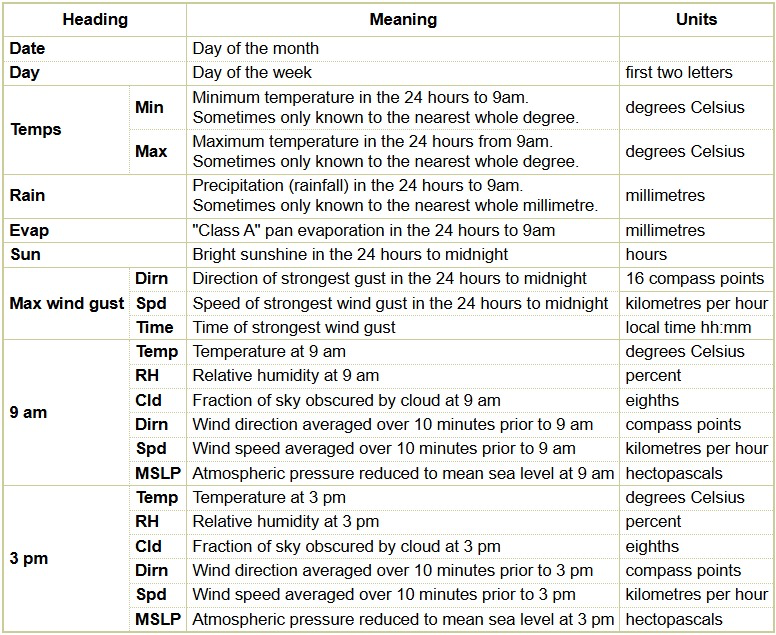

In [27]:
def check_raintoday_condition(df):
    condition = ((df['Rainfall'] >= 1) & (df['RainToday'] == 'Yes')) | ((df['Rainfall'] < 1) & (df['RainToday'] == 'No'))
    count_true = condition.sum()
    count_false = len(df) - count_true
    return count_true, count_false

count_true, count_false = check_raintoday_condition(dataset_clean)
print("Numero de filas que satisfacen la condicion:", count_true)
print("Numero de filas que no satisfacen la condicion:", count_false)

Numero de filas que satisfacen la condicion: 139040
Numero de filas que no satisfacen la condicion: 1747


In [28]:
condition = ((dataset['Rainfall'] >= 1) & (dataset['RainToday'] == 'Yes')) | ((dataset['Rainfall'] < 1) & (dataset['RainToday'] == 'No'))

dataset_clean[~condition]


/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/2539287745.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_clean[~condition]


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
224,2009-07-13,Albury,5.9,13.1,1.0,NaN,NaN,WNW,41.0,N,...,82.0,73.0,1007.6,1005.5,8.0,8.0,9.0,12.3,No,Yes
263,2009-08-21,Albury,7.3,14.8,1.0,NaN,NaN,WNW,59.0,NNE,...,72.0,85.0,1004.0,1001.7,3.0,8.0,13.3,10.1,No,Yes
375,2009-12-11,Albury,9.2,22.6,1.0,NaN,NaN,SW,41.0,WSW,...,62.0,30.0,1016.9,1016.3,6.0,3.0,12.8,21.0,No,No
747,2010-12-18,Albury,14.0,20.8,1.0,NaN,NaN,WNW,76.0,NNW,...,64.0,52.0,1002.4,1002.8,NaN,7.0,16.9,18.7,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144202,2014-01-15,Uluru,23.3,40.0,1.0,NaN,NaN,ENE,56.0,NE,...,31.0,16.0,1007.2,1002.5,NaN,NaN,32.9,38.8,No,No
144544,2014-12-23,Uluru,23.8,33.9,1.0,NaN,NaN,ESE,46.0,SE,...,53.0,37.0,1011.6,1008.5,8.0,8.0,26.3,32.6,No,Yes
144795,2015-08-31,Uluru,13.4,28.7,1.0,NaN,NaN,NW,57.0,ESE,...,65.0,29.0,1018.4,1013.1,4.0,7.0,17.0,27.3,No,No
144856,2015-10-31,Uluru,21.4,39.8,1.0,NaN,NaN,WSW,39.0,WNW,...,32.0,9.0,1012.4,1007.7,NaN,2.0,31.1,39.0,No,No


Observamos que tenemos filas que no cunplen la condicion de la variable. Es decir por mas que Rainfall sea mayor que o igual a 1, RainToday esta marcado como NO cuando deberia ser YES

In [34]:
# actualizo para pisar los datos:

dataset_clean.loc[~condition, 'RainToday'] = 'Yes'
count_true, count_false = check_raintoday_condition(dataset_clean)
print("Numero de filas que satisfacen la condicion:", count_true)
print("Numero de filas que no satisfacen la condicion:", count_false)

Numero de filas que satisfacen la condicion: 140787
Numero de filas que no satisfacen la condicion: 0


##### IMPUTACIÓN DE DATOS FALTANTES

Para imputar los datos faltantes en este análisis consideraremos factores temporales (mes) y geográficos (region) como elementos clave para rellenar los valores faltantes. 

Usaremos este enfoque ya que para predecir la precipitación, la geografía y el tiempo están estrechamente relacionados.

Entonces haremos lo siguiente:

- Separación de Columnas (columnas numericas y categoricas)
- Cálculo de Medianas y Modas por Mes y Región: los datos se agrupan utilizando dos dimensiones clave: mes y región. Este paso crea grupos de datos específicos para cada combinación de mes y región. Si una combinación de mes y región contiene solo datos faltantes, calculamos la moda/mediana para todas las regiones de ese mes.
- Imputación Basada en Mediana y Moda: Para rellenar los valores faltantes, se usa la mediana para datos numéricos y la moda para datos categóricos. Sin embargo, en lugar de calcular estas estadísticas globalmente, se calculan para cada grupo definido por mes y región. Así, los valores faltantes se rellenan teniendo en cuenta el contexto específico de mes y región.

Este enfoque tiene como objetivo imputar los datos faltantes considerando las variaciones geográficas y temporales.

In [39]:
# ajusto el dataset para separar por mes la informacion
dataset_clean["Date"] = pd.to_datetime(dataset_clean['Date'])
dataset_clean['Year'] = dataset_clean['Date'].dt.year
dataset_clean['Month'] = dataset_clean['Date'].dt.month
dataset_clean['Day'] = dataset_clean['Date'].dt.day

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/666575866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean["Date"] = pd.to_datetime(dataset_clean['Date'])
/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/666575866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Year'] = dataset_clean['Date'].dt.year
/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/666575866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [40]:
numeric_cols = dataset_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = dataset_clean.select_dtypes(include=['object']).columns.tolist()

In [41]:
# Agrupo por mes y region -> luego calculo la mediana
region_montly_median = dataset_clean.groupby(['Month', 'Location'])[numeric_cols].median()

In [43]:
# Calculo la moda
region_montly_mode = dataset_clean.groupby(['Month', 'Location'])[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [44]:
region_montly_median

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Month Location                                                           
1     Adelaide          17.1     30.4       0.0          8.6     12.60   
      Albany            17.0     22.8       0.0          7.4      9.65   
      Albury            17.0     33.0       0.0          NaN       NaN   
      AliceSprings      21.9     36.7       0.0         13.0     12.00   
      BadgerysCreek     17.8     30.1       0.0          NaN       NaN   
...                      ...      ...       ...          ...       ...   
12    Watsonia          12.9     25.2       0.0          6.4     10.00   
      Williamtown       17.2     26.8       0.0          7.4      7.85   
      Witchcliffe       12.5     23.9       0.0          NaN       NaN   
      Wollongong        17.6     23.5       0.0          NaN       NaN   
      Woomera           17.5     33.1       0.0         14.0     12.50   

                     WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Month Location                                                                
1     Adelaide                37.0           9.0          15.0         48.0   
      Albany                   NaN          15.0          24.0         70.0   
      Albury                  37.0           9.0          15.0         51.0   
      AliceSprings            44.0          17.0          19.0         32.0   
      BadgerysCreek           35.0           6.0          15.0         72.5   
...                            ...           ...           ...          ...   
12    Watsonia                37.0           9.0          17.0         67.0   
      Williamtown             41.0          14.0          24.0         68.0   
      Witchcliffe             43.0          19.0          24.0         54.0   
      Wollongong              45.0          17.0          21.0         75.0   
      Woomera                 46.0          22.0          19.5         38.0   

                     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Month Location                                                         
1     Adelaide              31.0      1013.80      1012.05       NaN   
      Albany                69.0      1015.60      1013.85       6.0   
      Albury                27.0      1012.60      1009.80       7.0   
      AliceSprings          20.0      1008.15      1004.70       3.0   
      BadgerysCreek         49.0      1014.30      1011.90       NaN   
...                          ...          ...          ...       ...   
12    Watsonia              46.0      1014.40      1012.10       6.0   
      Williamtown           55.0      1014.90      1012.90       6.0   
      Witchcliffe           49.0      1015.40      1014.10       NaN   
      Wollongong            73.0      1014.85      1013.20       8.0   
      Woomera               16.0      1013.10      1010.60       1.0   

                     Cloud3pm  Temp9am  Temp3pm  
Month Location                                   
1     Adelaide            NaN    21.70    28.90  
      Albany              4.0    20.05    21.10  
      Albury              5.0    23.00    31.20  
      AliceSprings        5.0    29.70    35.40  
      BadgerysCreek       NaN    22.30    28.20  
...                       ...      ...      ...  
12    Watsonia            6.0    16.60    23.00  
      Williamtown         6.0    22.50    25.00  
      Witchcliffe         NaN    19.50    21.80  
      Wollongong          8.0    20.70    21.90  
      Woomera             1.0    22.60    30.65  

[588 rows x 16 columns]

In [45]:
region_montly_mode

Location WindGustDir WindDir9am WindDir3pm  \
Month Location                                                         
1     Adelaide            Adelaide         WSW         SW        WSW   
      Albany                Albany        None          E        ESE   
      Albury                Albury           W         SE          W   
      AliceSprings    AliceSprings         ESE          E        ESE   
      BadgerysCreek  BadgerysCreek           E        NNE        ENE   
...                            ...         ...        ...        ...   
12    Watsonia            Watsonia         SSW         SW        SSW   
      Williamtown      Williamtown          SE         NE        ESE   
      Witchcliffe      Witchcliffe         SSE         SE        SSE   
      Wollongong        Wollongong          NE          S         NE   
      Woomera              Woomera         SSW         SE        SSW   

                    RainToday RainTomorrow  
Month Location                              
1     Adelaide             No           No  
      Albany               No           No  
      Albury               No           No  
      AliceSprings         No           No  
      BadgerysCreek        No           No  
...                       ...          ...  
12    Watsonia             No           No  
      Williamtown          No           No  
      Witchcliffe          No           No  
      Wollongong           No           No  
      Woomera              No           No  

[588 rows x 6 columns]

In [46]:
# Algunas regiones no tiene valores para un dado mes como vimos arriva. Vamos a utilizar la moda y media para todas las regiones

region_montly_median.fillna(region_montly_median.mean(), inplace=True)
region_montly_mode.fillna(region_montly_mode.mode().iloc[0], inplace=True)

In [47]:
region_montly_median

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Month Location                                                           
1     Adelaide          17.1     30.4       0.0     8.600000   12.6000   
      Albany            17.0     22.8       0.0     7.400000    9.6500   
      Albury            17.0     33.0       0.0     5.116752    8.5775   
      AliceSprings      21.9     36.7       0.0    13.000000   12.0000   
      BadgerysCreek     17.8     30.1       0.0     5.116752    8.5775   
...                      ...      ...       ...          ...       ...   
12    Watsonia          12.9     25.2       0.0     6.400000   10.0000   
      Williamtown       17.2     26.8       0.0     7.400000    7.8500   
      Witchcliffe       12.5     23.9       0.0     5.116752    8.5775   
      Wollongong        17.6     23.5       0.0     5.116752    8.5775   
      Woomera           17.5     33.1       0.0    14.000000   12.5000   

                     WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Month Location                                                                
1     Adelaide           37.000000           9.0          15.0         48.0   
      Albany             38.192376          15.0          24.0         70.0   
      Albury             37.000000           9.0          15.0         51.0   
      AliceSprings       44.000000          17.0          19.0         32.0   
      BadgerysCreek      35.000000           6.0          15.0         72.5   
...                            ...           ...           ...          ...   
12    Watsonia           37.000000           9.0          17.0         67.0   
      Williamtown        41.000000          14.0          24.0         68.0   
      Witchcliffe        43.000000          19.0          24.0         54.0   
      Wollongong         45.000000          17.0          21.0         75.0   
      Woomera            46.000000          22.0          19.5         38.0   

                     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Month Location                                                         
1     Adelaide              31.0      1013.80      1012.05  4.907658   
      Albany                69.0      1015.60      1013.85  6.000000   
      Albury                27.0      1012.60      1009.80  7.000000   
      AliceSprings          20.0      1008.15      1004.70  3.000000   
      BadgerysCreek         49.0      1014.30      1011.90  4.907658   
...                          ...          ...          ...       ...   
12    Watsonia              46.0      1014.40      1012.10  6.000000   
      Williamtown           55.0      1014.90      1012.90  6.000000   
      Witchcliffe           49.0      1015.40      1014.10  4.907658   
      Wollongong            73.0      1014.85      1013.20  8.000000   
      Woomera               16.0      1013.10      1010.60  1.000000   

                     Cloud3pm  Temp9am  Temp3pm  
Month Location                                   
1     Adelaide       4.904279    21.70    28.90  
      Albany         4.000000    20.05    21.10  
      Albury         5.000000    23.00    31.20  
      AliceSprings   5.000000    29.70    35.40  
      BadgerysCreek  4.904279    22.30    28.20  
...                       ...      ...      ...  
12    Watsonia       6.000000    16.60    23.00  
      Williamtown    6.000000    22.50    25.00  
      Witchcliffe    4.904279    19.50    21.80  
      Wollongong     8.000000    20.70    21.90  
      Woomera        1.000000    22.60    30.65  

[588 rows x 16 columns]

In [48]:
region_montly_mode

Location WindGustDir WindDir9am WindDir3pm  \
Month Location                                                         
1     Adelaide            Adelaide         WSW         SW        WSW   
      Albany                Albany           E          E        ESE   
      Albury                Albury           W         SE          W   
      AliceSprings    AliceSprings         ESE          E        ESE   
      BadgerysCreek  BadgerysCreek           E        NNE        ENE   
...                            ...         ...        ...        ...   
12    Watsonia            Watsonia         SSW         SW        SSW   
      Williamtown      Williamtown          SE         NE        ESE   
      Witchcliffe      Witchcliffe         SSE         SE        SSE   
      Wollongong        Wollongong          NE          S         NE   
      Woomera              Woomera         SSW         SE        SSW   

                    RainToday RainTomorrow  
Month Location                              
1     Adelaide             No           No  
      Albany               No           No  
      Albury               No           No  
      AliceSprings         No           No  
      BadgerysCreek        No           No  
...                       ...          ...  
12    Watsonia             No           No  
      Williamtown          No           No  
      Witchcliffe          No           No  
      Wollongong           No           No  
      Woomera              No           No  

[588 rows x 6 columns]

Una vez que tengo esto debo rellenar la informacion de las columnas faltantes en el dataset

In [50]:
# Rellenar valores faltantes para columnas numéricas
dataset_clean[numeric_cols] = dataset_clean.apply(
    lambda row: pd.Series(
        [region_montly_median.loc[(row['Month'], row['Location']), col] if pd.isna(row[col]) else row[col] for col in numeric_cols],
        index=numeric_cols
    ),
    axis=1
)

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/1500975317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[numeric_cols] = dataset_clean.apply(


In [52]:
# Rellenar valores faltantes para columnas categóricas
dataset_clean[categorical_cols] = dataset_clean.apply(
    lambda row: pd.Series(
        [region_montly_mode.loc[(row['Month'], row['Location']), col] if pd.isna(row[col]) else row[col] for col in categorical_cols],
        index=categorical_cols
    ),
    axis=1
)

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_61843/126531212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[categorical_cols] = dataset_clean.apply(


In [56]:
numeric_var_null = dataset_clean.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100
print("Porcentaje de valores perdidos para variables numericas: ")
print(numeric_var_null)

categorical_var_null = dataset_clean.select_dtypes(include=['object']).isnull().mean() * 100
print("\nPorcentaje de valores perdidos para variables categoricas:")
print(categorical_var_null)

Porcentaje de valores perdidos para variables numericas: 
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

Porcentaje de valores perdidos para variables categoricas:
Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64


In [54]:
dataset_clean

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.116752,8.5775,E,31.0,ESE,...,1021.2,6.0,3.0,9.4,20.9,No,No,2017,6,20
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.116752,8.5775,E,31.0,SE,...,1020.3,6.0,3.0,10.1,22.4,No,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.116752,8.5775,NNW,22.0,SE,...,1019.1,6.0,3.0,10.9,24.5,No,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.116752,8.5775,N,37.0,SE,...,1016.8,6.0,3.0,12.5,26.1,No,No,2017,6,23
